The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
Note: All exercise data and structure are credited to Stanford University 

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 2 - Principle Component Analysis

In [213]:
#Import numpy libraries to deal with matrixes and vectors
import numpy as np
#Import pandas do read data files
import pandas as pd
#Import matplotlib to plot data
import matplotlib.pyplot as plt

#Import Image 
from PIL import Image

#Import math 
import math 

#Import scipy optimization function
from scipy import optimize, io

# Scipy rotate function 
from scipy.ndimage import rotate

#Matplotlib notebook property
%matplotlib inline

**Let's now look at another famous technique used to reduce dimensionality - Principal Component Analysis:**

In [146]:
# Read the dataset 
X = io.loadmat('ex7/ex7data1.mat')['X']

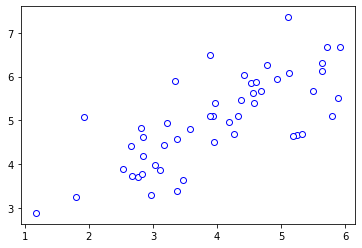

In [147]:
# Let's take a look at the points loaded in matrix 'data1'
plt.scatter(X[:,0], X[:,1], color='white', edgecolors='blue')

PCA is nothing more than a projection of the original data on a new 'axis'. 
<br>
From the plot above we can 'bring down' the points to the X-axis and only use one variable as a proxy. This, of course, makes you lose information.
<br>
<br>
An important step to develop PCA is to normalize features:

In [148]:
# Normalize Features - Applying standardization of the variables
def featureNormalize(features):
    
    mean = X.mean(axis=0)
    # To get the same result as Octave std function you have to set degrees of freedom to 1 with the ddof parameter
    
    sigma = X.std(axis=0,ddof=1)
    
    X_norm = ((X-mean)/sigma)
    
    return X_norm, mean, sigma

In [149]:
X_norm, mu, sigma = featureNormalize(X)

In [150]:
# Executing Principal Component Analysis

def PCA(X: np.array):
    
    m, n = X.shape
    
    U = np.zeros(n)
    S = np.zeros(n)
    
    # Compute covariance matrix
    
    cov = np.dot(X.T,X)/m
    
    # Use numpy singular value decomposition to return EigenValues and EigenVectors
    
    U, S, V = np.linalg.svd(cov)
    
    return U,S,V

In [151]:
U,S,V = PCA(X_norm)

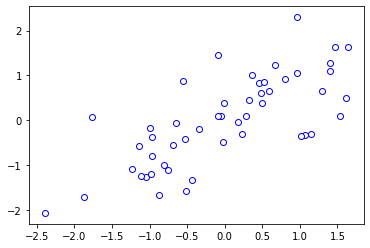

In [177]:
# Let's take a look at normalized data
plt.scatter(X_norm[:,0], X_norm[:,1], color='white', edgecolors='blue')

**How can we project this data to 1-dimension?**

In [153]:
K = 1

In [242]:
def projectData(
    X: np.array,
    U: np.array,
    K: int
    ):
    
    Z = np.zeros([X.shape[0],K])
    
    Z = np.dot(X,  U[:, :K])
    return Z

In [243]:
Z = projectData(X_norm, U, K)

In [251]:
def recoverData(Z, U, K):
    X_rec = np.zeros([Z.shape[1],U.shape[1]])

    X_rec = Z.dot(U[:, :K].T)
        
    return X_rec

In [181]:
X_rec = recoverData(Z, U, K)

By the figure below, you should understand how the real projection works. Basically, the points are projected into this single line, which can be handy for a lot of machine learning algorithms.

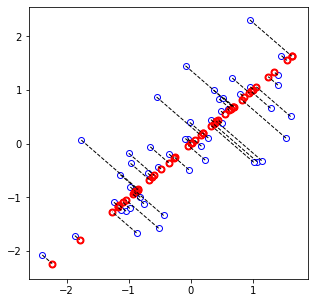

In [187]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plotting normalized data
plt.scatter(X_norm[:,0], X_norm[:,1], color='white', edgecolors='blue')

# Project the new points
plt.scatter(X_rec, X_rec,color='white', edgecolors='red')

# Plot lines connecting 
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

In [188]:
# Read the Face dataset 
X = io.loadmat('ex7/ex7faces.mat')['X']

In [244]:
def displayData(images: np.array, figsize1: int, figsize2: int) -> None:
    '''
    Plot 10 by 10 grid of images
    '''
    fig=plt.figure(figsize=(figsize1, figsize2))
    columns = figsize1
    rows = figsize2
    for i in range(0, images.shape[0]-1):
        img = images[i-1].reshape(32,32)
        if i > images.shape[0]:
            pass
        else:
            fig.add_subplot(rows, columns, i+1)
            plt.imshow(rotate(img[::-1],270), cmap='gray')
            plt.axis('off')
    plt.show()

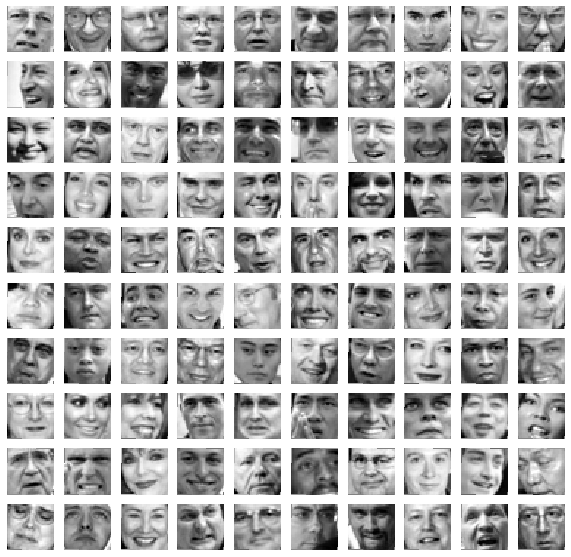

In [245]:
displayData(X[0:101], 10,10)

**Can you guess what happens if we run PCA on image data?**

In [246]:
X_norm, mu, sigma = featureNormalize(X)

In [247]:
U,S,V = PCA(X_norm)

In [248]:
K = 100

Z = projectData(X_norm, U, K)

In [252]:
X_rec = recoverData(Z, U, K)

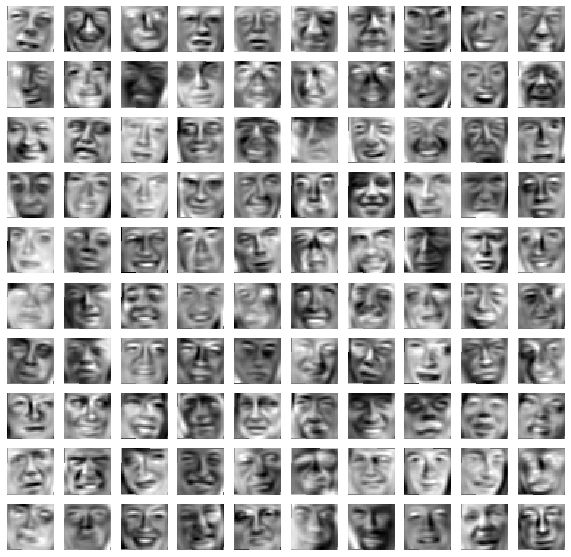

In [253]:
displayData(X_rec[0:101], 10,10)

Some high level contours of the faces have been lost. But notice how features such as nose and eyes shape still remain. What happens if we just retain 20 eigenvectors?

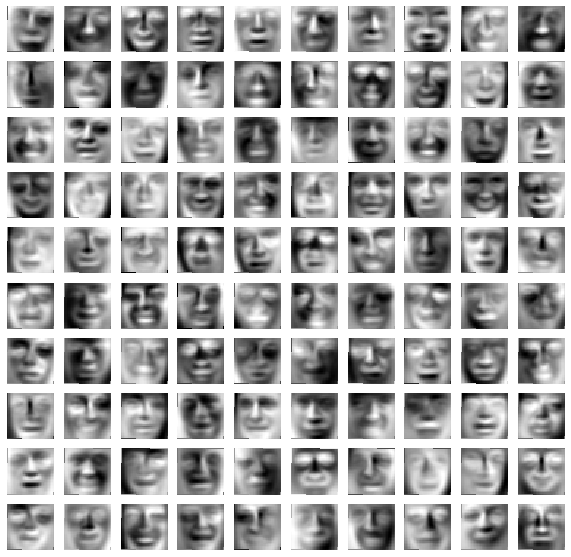

In [254]:
K = 20
Z = projectData(X_norm, U, K)
X_rec = recoverData(Z, U, K)
displayData(X_rec[0:101], 10,10)

Even more details of the faces are stripped out and you start to get a more blurred image. As you project the data to less and less dimension you start to have less detail and information about those images.